In this post, I will show how to play with [matplotlib](http://www.matplotlib.org)'s patches to create a *gauge* or *meter*, the goal will be to get something like the [Australian Bureau of Meteorology's ENSO tracker](http://www.bom.gov.au/climate/enso/) below

<br>

![](http://www.bom.gov.au/climate/enso/tracker/images/dial-5.png)

<!-- TEASER_END -->

### imports 

In [1]:
%matplotlib inline

In [2]:
import os, sys
import matplotlib
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np

<br>
Looking at the BoM ENSO tracker above, it looks like we can build our tracker using a mix of
circles, wedges and rectangles, we will also need an arrow, and for that we will use the [arrow](http://matplotlib.org/examples/pylab_examples/arrow_simple_demo.html) 
function of the [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html). 

<br>
A good place to start to have a feel of what you can do with matplotlib patches is the [patch collection example code](http://matplotlib.org/examples/api/patch_collection.html) on matplotlib's website. 

<br>
To dig more into each of the individual patches, head to [the relevant section of  the documentation on matplotlib.patches](http://matplotlib.org/api/patches_api.html)

In [18]:
from matplotlib.patches import Circle, Wedge, Rectangle

<br>
### some function definitions
<br>
below some functions to deal with some basic trigonometry that we'll be using to 
draw the wedges (i.e. the *sectors* of the gauge) and to point the arrow to the 
right sector

In [4]:
def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

In [5]:
def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

<br>
### main gauge function

In [24]:
def gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    
    """
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]

    
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

## testing

<br>
let's test our brand new gauge function now

<br>
### with a list of pre-defined colors 

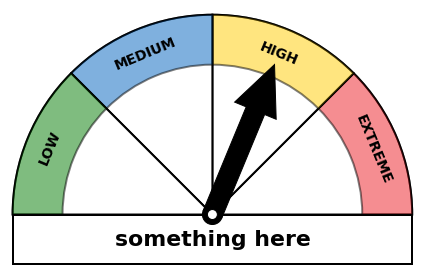

In [25]:
gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
      colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], arrow=3, title='something here') 

<br>
### using 6 instead of 5 categories, and a linear colormap

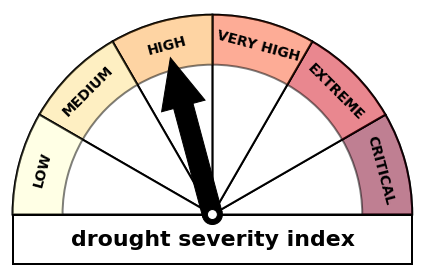

In [28]:
gauge(labels=['LOW','MEDIUM','HIGH','VERY HIGH','EXTREME','CRITICAL'], \
      colors='YlOrRd_r', arrow=3, title='drought severity index') 

<br>
### and finally our *ENSO tracker*

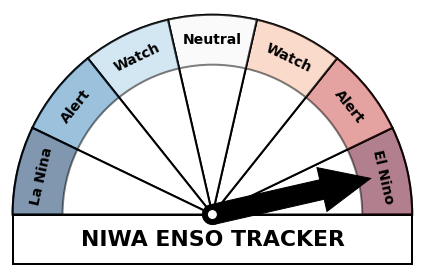

In [29]:
gauge(labels=['La Nina','Alert','Watch','Neutral','Watch','Alert','El Nino'], \
      colors='RdBu', arrow=7, title='NIWA ENSO TRACKER')